In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('/spam.csv',encoding='latin-1')

In [4]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#removing nan\
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)


In [6]:
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#v1 to label, v2 to msg
data=data.rename(columns={"v1":'label',"v2":'msg'})

In [8]:
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#check total msg
print(len(data))

5572


In [12]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [15]:
data['length']=data['msg'].apply(len)
data.head()

,label,msg,lenght,length
0,ham,"Go until jurong point, crazy.. Available only ...",111,111
1,ham,Ok lar... Joking wif u oni...,29,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,155
3,ham,U dun say so early hor... U c already then say...,49,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

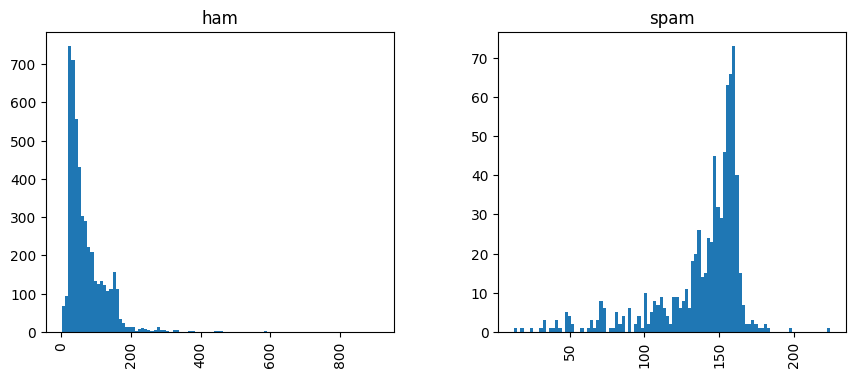

In [20]:
data.hist(column='length',by='label',bins=100,figsize=(10,4))

In [56]:
data.loc[:,'label']=data.label.map({'ham':0,'spam':1})

<ipython-input-56-9b401fb94119>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'label']=data.label.map({'ham':0,'spam':1})


In [81]:
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import  CountVectorizer
X_train,X_test,y_train,y_test=tts(data['msg'],data['label'],test_size=0.2,random_state=1)

In [85]:
cv = CountVectorizer()
X_train=[text.lower() for text in X_train]
X_test=[text.lower() for text in X_test]
traindat=cv.fit_transform(X_train)
testdat=cv.transform(X_test)


In [86]:
MultinomialNB(alpha=1.0,class_prior=None,fit_prior=True)
predictions=nb.predict(testdat)

In [88]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(traindat,y_train)

MultinomialNB()

In [89]:
from sklearn.metrics import accuracy_score,recall_score,f1_score
g=[accuracy_score,precision_score,recall_score,f1_score]

print("acc",accuracy_score(y_test,predictions))
print("rec",recall_score(y_test,predictions))
print("f1",f1_score(y_test,predictions))

acc 0.9847533632286996
rec 0.935251798561151
f1 0.9386281588447652
